In [6]:
import numpy as np
import pandas as pd
from datetime import datetime
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams


In [7]:
rcParams['figure.figsize']=15,6

In [8]:
data_zinc=pd.read_csv('zinc_prices_IMF.csv')

In [9]:
data_zinc.head()

,Date,Price
0,1-Jan-80,773.82
1,1-Feb-80,868.62
2,1-Mar-80,740.75
3,1-Apr-80,707.68
4,1-May-80,701.07


In [11]:
data_zinc.describe()

,Price
count,434.000000
mean,1362.338594
std,677.071321
min,597.450000
25%,875.355000
50%,1088.875000
75%,1742.052500
max,4381.450000


In [12]:
data_zinc.isnull().sum()

Date     0
Price    0
dtype: int64

In [13]:
data_zinc.loc[:,'Date']=pd.to_datetime(data_zinc['Date'])

In [14]:
data_zinc

,Date,Price
0,1980-01-01,773.82
1,1980-02-01,868.62
2,1980-03-01,740.75
3,1980-04-01,707.68
4,1980-05-01,701.07
...,...,...
429,2015-10-01,1724.34
430,2015-11-01,1583.31
431,2015-12-01,1527.79
432,2016-01-01,1520.36


In [16]:
data_zinc.set_index('Date',inplace=True)

In [18]:
data_zinc.index

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01'],
              dtype='datetime64[ns]', name='Date', length=434, freq=None)

<AxesSubplot:xlabel='Date'>

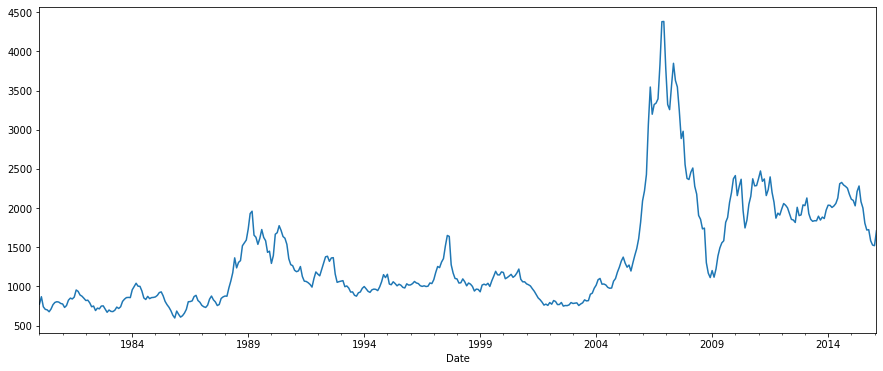

In [20]:
ts=data_zinc['Price']
ts.plot()

In [22]:
ts_log=np.log(ts)
ts_log

Date
1980-01-01    6.651339
1980-02-01    6.766906
1980-03-01    6.607663
1980-04-01    6.561992
1980-05-01    6.552608
                ...   
2015-10-01    7.452600
2015-11-01    7.367273
2015-12-01    7.331578
2016-01-01    7.326702
2016-02-01    7.444161
Name: Price, Length: 434, dtype: float64

In [24]:
def test_stationality(timeseries):
    rol_mean=timeseries.rolling(window=52,center=False).mean()
    rol_std=timeseries.rolling(window=52,center=False).std()
    orig=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(rol_mean,color='red',label='Mean')
    std=plt.plot(rol_std,color='black',label='STD')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print ('Results of Dickey-Fuller Test:')
    dftest=adfuller(timeseries,autolag='AIC')
    dfoutput=pd.Series(dftest[:4],index=['Test Statistics','P-r','#lag','Number'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

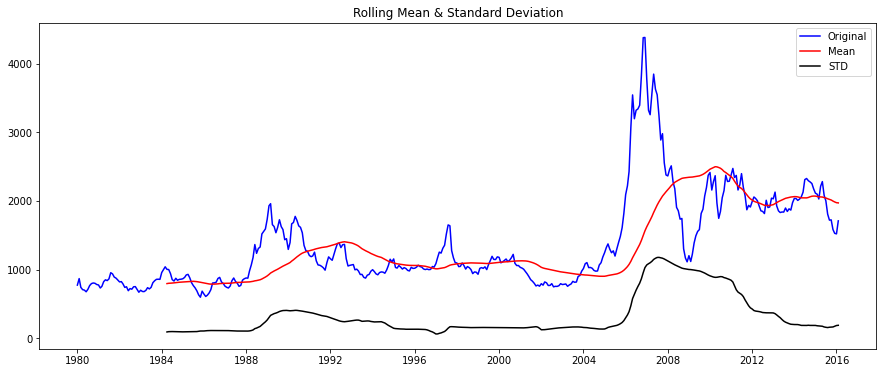

Results of Dickey-Fuller Test:
Test Statistics          -3.139601
P-r                       0.023758
#lag                      7.000000
Number                  426.000000
Critical Value (1%)      -3.445794
Critical Value (5%)      -2.868349
Critical Value (10%)     -2.570397
dtype: float64


In [25]:
test_stationality(data_zinc['Price'])

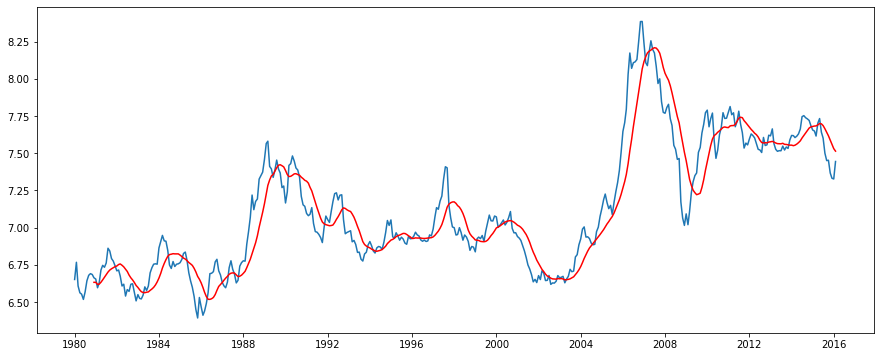

In [26]:
movingAverage = ts_log.rolling(window=12).mean()
movingSTD = ts_log.rolling(window=12).std()
plt.plot(ts_log)
plt.plot(movingAverage, color='red')

In [30]:
ts_log_mv_diff = ts_log - movingAverage
ts_log_mv_diff.head(12)

Date
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01         NaN
1980-08-01         NaN
1980-09-01         NaN
1980-10-01         NaN
1980-11-01         NaN
1980-12-01    0.030472
Name: Price, dtype: float64

In [31]:
ts_log_mv_diff.dropna(inplace=True)

In [32]:
ts_log_mv_diff.head()

Date
1980-12-01    0.030472
1981-01-01    0.021753
1981-02-01   -0.022485
1981-03-01    0.008392
1981-04-01    0.082191
Name: Price, dtype: float64

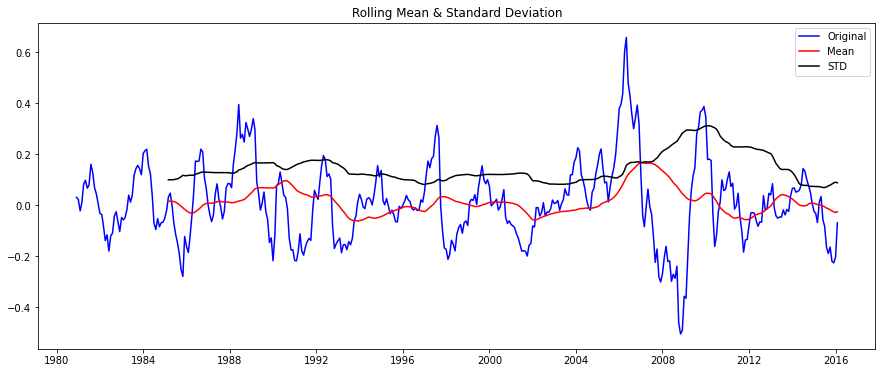

Results of Dickey-Fuller Test:
Test Statistics        -5.898484e+00
P-r                     2.814411e-07
#lag                    4.000000e+00
Number                  4.180000e+02
Critical Value (1%)    -3.446091e+00
Critical Value (5%)    -2.868479e+00
Critical Value (10%)   -2.570466e+00
dtype: float64


In [34]:
test_stationality(ts_log_mv_diff)

c:\users\amals\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


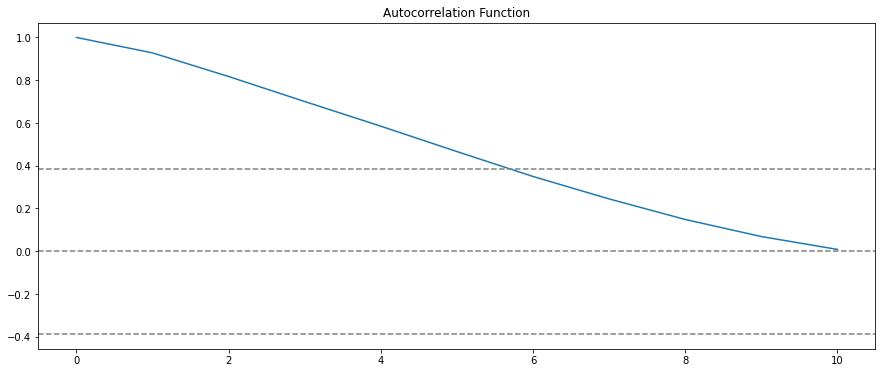

In [35]:
plt.plot(np.arange(0,11), acf(ts_log_mv_diff, nlags = 10))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

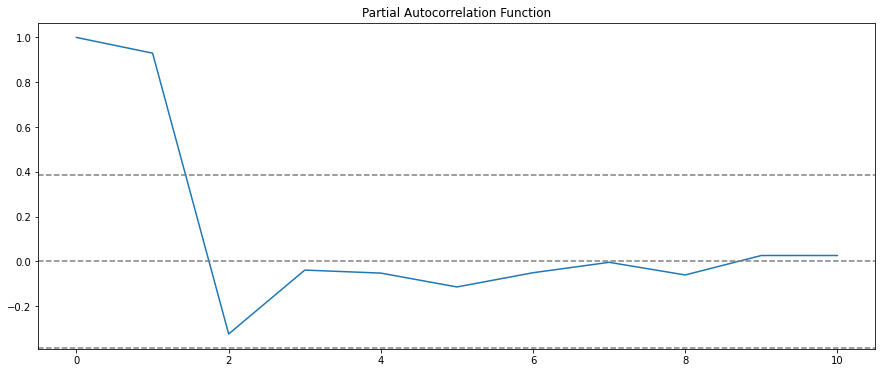

In [36]:
plt.plot(np.arange(0,11), pacf(ts_log_mv_diff, nlags = 10))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

c:\users\amals\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\amals\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequ

Text(0.5, 1.0, 'RSS: nan')

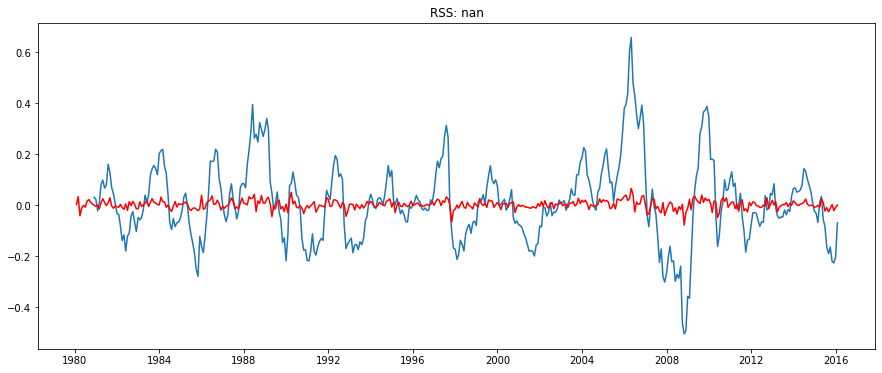

In [37]:
model = ARIMA(ts_log, order=(1, 1, 0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_mv_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues[1:] - ts_log_mv_diff)**2))

In [38]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Date
1980-02-01    0.002030
1980-03-01    0.033049
1980-04-01   -0.042031
1980-05-01   -0.011002
1980-06-01   -0.001089
dtype: float64

In [39]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Date
1980-02-01    0.002030
1980-03-01    0.035079
1980-04-01   -0.006952
1980-05-01   -0.017955
1980-06-01   -0.019043
dtype: float64

In [41]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
1980-01-01    6.651339
1980-02-01    6.653369
1980-03-01    6.686418
1980-04-01    6.644387
1980-05-01    6.633384
dtype: float64

Text(0.5, 1.0, 'RMSE: 429.0141')

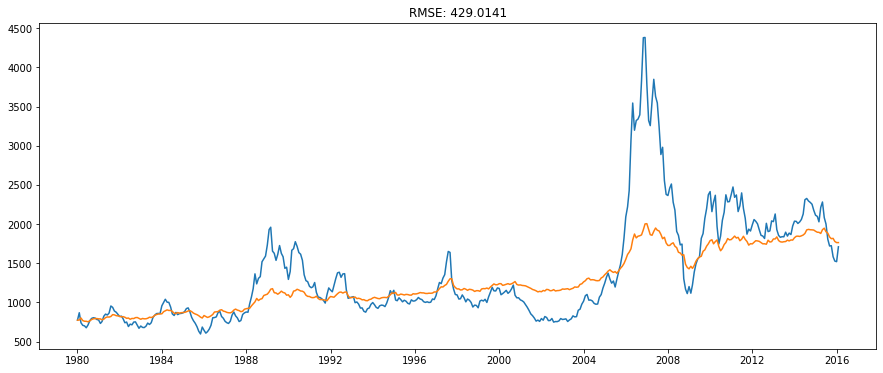

In [42]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))